# Description/Overview of the data tables used

Overviews, descriptive statistics of the data table.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
combined_table = pd.read_csv('results_2023_10_18/combined_data_table.csv', dtype={'public_client_id': str})

/tmp/ipykernel_521/3589811407.py:1: DtypeWarning: Columns (992) have mixed types. Specify dtype option on import or set low_memory=False.
  combined_table = pd.read_csv('results_2023_10_18/combined_data_table.csv', dtype={'public_client_id': str})


Text(0.5, 1.0, 'days in program')

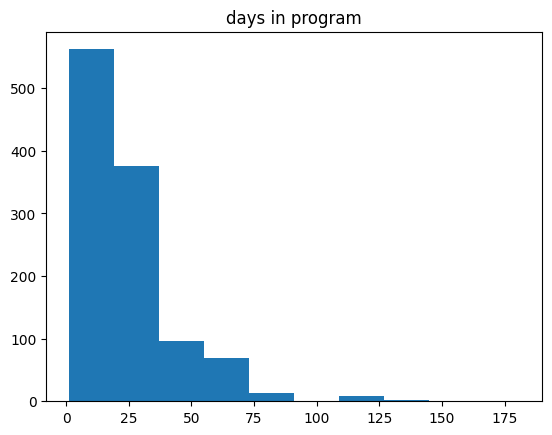

In [3]:
plt.hist(combined_table.days_in_program)
plt.title('days in program')

## Aggregate data statistics

In [4]:
combined_table.agg({'age': ['count', 'min', 'mean', 'median', 'max', 'std'],
                    'bmi': ['count', 'min', 'mean', 'median', 'max', 'std'],
                    'GLYCOHEMOGLOBIN A1C': ['count', 'min', 'mean', 'median', 'max', 'std'],
                    'GLUCOSE': ['count', 'min', 'mean', 'median', 'max', 'std'],
                    'GFR, MDRD': ['count', 'min', 'mean', 'median', 'max', 'std'],
                    'INSULIN': ['count', 'min', 'mean', 'median', 'max', 'std'],
                    'HOMA-IR': ['count', 'min', 'mean', 'median', 'max', 'std'],}).T

,count,min,mean,median,max,std
age,1131.0,18.000000,49.526083,49.000000,87.000000,11.291785
bmi,1131.0,17.739594,27.628528,26.149654,53.349371,6.036962
GLYCOHEMOGLOBIN A1C,1131.0,3.600000,5.505305,5.500000,8.300000,0.432617
GLUCOSE,1131.0,70.000000,93.242263,91.000000,199.000000,12.176272
"GFR, MDRD",1131.0,41.000000,90.173298,90.000000,131.000000,15.171761
INSULIN,1131.0,1.400000,10.668877,8.900000,55.100000,7.341579
HOMA-IR,1131.0,0.245432,2.558971,1.977778,20.342222,2.161769


In [5]:
combined_table.agg({'d_HbA1C': ['count', 'min', 'mean', 'median', 'max', 'std'],
                    'd_GLUCOSE': ['count', 'min', 'mean', 'median', 'max', 'std'],
                    'd_GFR': ['count', 'min', 'mean', 'median', 'max', 'std'],
                    'd_INSULIN': ['count', 'min', 'mean', 'median', 'max', 'std'],
                    'd_HOMA-IR': ['count', 'min', 'mean', 'median', 'max', 'std'],}).T

,count,min,mean,median,max,std
d_HbA1C,1131.0,-1.500000,-0.047834,-0.100000,1.400000,0.294044
d_GLUCOSE,1131.0,-49.000000,-0.482759,0.000000,39.000000,7.780530
d_GFR,1131.0,-30.000000,1.035367,0.000000,45.000000,9.436260
d_INSULIN,1131.0,-31.500000,-0.887710,-0.400000,22.700000,4.968784
d_HOMA-IR,1131.0,-11.090123,-0.243662,-0.122963,7.090864,1.428360


In [6]:
combined_table.agg({'d_1y_HbA1C': ['count', 'min', 'mean', 'median', 'max', 'std'],
                    'd_1y_GLUCOSE': ['count', 'min', 'mean', 'median', 'max', 'std'],
                    'd_1y_GFR': ['count', 'min', 'mean', 'median', 'max', 'std'],
                    'd_1y_INSULIN': ['count', 'min', 'mean', 'median', 'max', 'std'],
                    'd_1y_HOMA-IR': ['count', 'min', 'mean', 'median', 'max', 'std'],}).T

,count,min,mean,median,max,std
d_1y_HbA1C,639.0,-1.900000,-0.111581,-0.100000,1.000000,0.308689
d_1y_GLUCOSE,639.0,-57.000000,-0.178404,1.000000,51.000000,8.889399
d_1y_GFR,639.0,-28.000000,-0.053208,0.000000,53.000000,10.444974
d_1y_INSULIN,639.0,-33.200000,-0.982942,-0.600000,54.400000,5.413038
d_1y_HOMA-IR,639.0,-12.895556,-0.250617,-0.113333,23.291111,1.803096


In [7]:
print('6mo d_HbA1C increase:', combined_table[combined_table['d_HbA1C'] > 0].shape[0])
print('6mo d_HbA1C decrease:', combined_table[combined_table['d_HbA1C'] < 0].shape[0])
print('6mo d_HbA1C no change:', combined_table[combined_table['d_HbA1C'] == 0].shape[0])

print('1y d_HbA1C increase:', combined_table[combined_table['d_1y_HbA1C'] > 0].shape[0])
print('1y d_HbA1C decrease:', combined_table[combined_table['d_1y_HbA1C'] < 0].shape[0])
print('1y d_HbA1C no change:', combined_table[combined_table['d_1y_HbA1C'] == 0].shape[0])

6mo d_HbA1C increase: 374
6mo d_HbA1C decrease: 604
6mo d_HbA1C no change: 153
1y d_HbA1C increase: 167
1y d_HbA1C decrease: 399
1y d_HbA1C no change: 73


In [8]:
combined_table['d_HbA1C_class'].sum()

185.0

In [9]:
combined_table['d_1y_HbA1C_class'].sum()

87.0

In [10]:
# TODO: do a plot of all the hba1c changes. the median change is decreasing, but this hides a substantial amount of variation.
#

## Plots of HbA1C changes over time

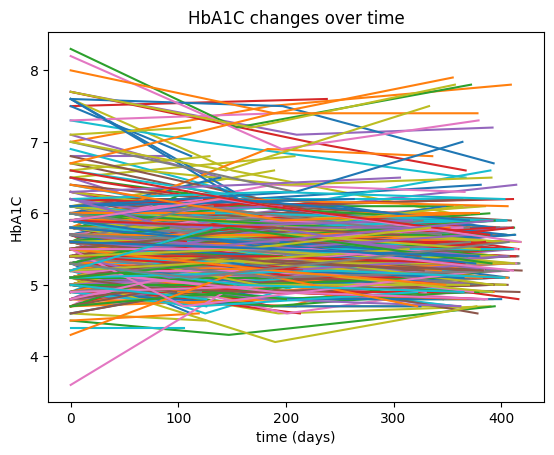

In [11]:
for i, row in combined_table.iterrows():
    plt.plot([0, row['days_til_next'], row['days_til_next_1y']], [row['GLYCOHEMOGLOBIN A1C'], row.next_HbA1C, row.next_1y_HbA1C])
plt.title('HbA1C changes over time')
plt.xlabel('time (days)')
plt.ylabel('HbA1C')
plt.savefig('images/hba1c_all_changes.png')
plt.show()

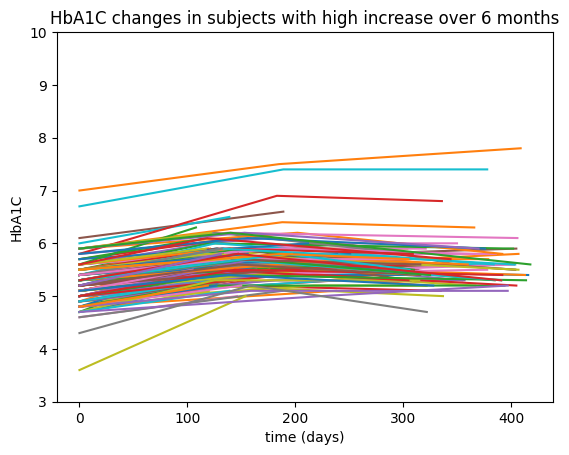

In [12]:
for i, row in combined_table.iterrows():
    if row['d_HbA1C_class']:
        plt.plot([0, row['days_til_next'], row['days_til_next_1y']], [row['GLYCOHEMOGLOBIN A1C'], row.next_HbA1C, row.next_1y_HbA1C])
plt.title('HbA1C changes in subjects with high increase over 6 months')
plt.xlabel('time (days)')
plt.ylabel('HbA1C')
plt.ylim(3, 10)
plt.savefig('images/hba1c_high_changes_t1.png')
plt.show()

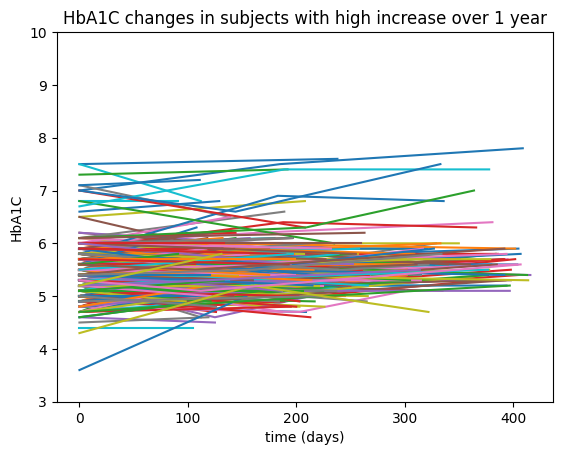

In [13]:
for i, row in combined_table.iterrows():
    if row['d_1y_HbA1C_class']:
        plt.plot([0, row['days_til_next'], row['days_til_next_1y']], [row['GLYCOHEMOGLOBIN A1C'], row.next_HbA1C, row.next_1y_HbA1C])
plt.title('HbA1C changes in subjects with high increase over 1 year')
plt.xlabel('time (days)')
plt.ylabel('HbA1C')
plt.ylim(3, 10)
plt.savefig('images/hba1c_high_changes_t2.png')
plt.show()

## Plots of ML predictions vs actual values for changes in HbA1C

In [14]:
# TODO: load data, columns
selected_columns_full = np.loadtxt('results_2023_10_18/selected_columns_full.txt', dtype=str, delimiter='\t').tolist()
chem_subset_cols = np.loadtxt('results_2023_10_18/chem_subset_cols.txt', dtype=str, delimiter='\t').tolist()
selected_chem_bp_cols = np.loadtxt('results_2023_10_18/selected_chem_bp_cols.txt', dtype=str, delimiter='\t').tolist()
selected_prot_cols = np.loadtxt('results_2023_10_18/selected_prot_cols.txt', dtype=str, delimiter='\t').tolist()
selected_met_cols = np.loadtxt('results_2023_10_18/selected_met_cols.txt', dtype=str, delimiter='\t').tolist()

# load model params

In [15]:
# identify proteins that are the same

In [16]:
prot_names = pd.read_csv('../arivale_data/arivale_prots.tsv', sep='\t')

In [17]:
gene_names = prot_names.groupby('gene_name')['index'].unique()

In [18]:
duplicate_gene_names = gene_names[gene_names.map(len) > 1]

In [19]:
duplicate_gene_names

gene_name
AREG,AREGB                            [IRE_P15514, ONC2_P15514]
BOC                                   [CRE_Q9BWV1, CVD2_Q9BWV1]
CCL11                                  [INF_P51671, IRE_P51671]
CCL2                                  [CVD3_P13500, INF_P13500]
CCL3                                  [CVD2_P10147, INF_P10147]
CXCL1                                 [CVD2_P09341, INF_P09341]
DCBLD2                                 [CRE_Q96PD2, IRE_Q96PD2]
ENTPD6                                 [CRE_O75354, ODA_O75354]
FGF21                     [CRE_Q9NSA1, CVD2_Q9NSA1, INF_Q9NSA1]
FGF23                                 [CVD2_Q9GZV9, INF_Q9GZV9]
FIGF                                  [CRE_O43915, CVD2_O43915]
GDNF                                  [INF_P39905, NEU1_P39905]
GPNMB                                 [NEX_Q14956, ONC2_Q14956]
HAVCR1                                [CVD2_Q96D42, ODA_Q96D42]
HGF                                   [INF_P14210, ONC2_P14210]
IL10                          

In [20]:
for index, ids in duplicate_gene_names.items():
    all_table_ids = []
    table_ids = []
    for i in ids:
        if i in combined_table.columns:
            table_ids.append(i)
            all_table_ids.append(combined_table[i])
    if len(all_table_ids) > 1:
        table_mean = combined_table[table_ids].mean(axis=1, skipna=True)
            
        correlations = np.corrcoef(combined_table[table_ids[0]].to_numpy(), combined_table[table_ids[1]].to_numpy())
        print(index, table_ids)
        print(correlations[0, 1])

In [22]:
import sklearn.metrics

(array([350., 471., 180.,  61.,  34.,  13.,   8.,   5.,   2.,   7.]),
 array([ 1.4 ,  6.77, 12.14, 17.51, 22.88, 28.25, 33.62, 38.99, 44.36,
        49.73, 55.1 ]),
 <BarContainer object of 10 artists>)

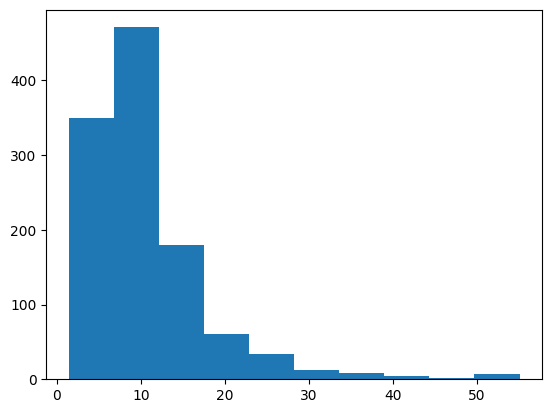

In [23]:
plt.hist(combined_table['INSULIN'])

In [24]:
combined_table[['GLYCOHEMOGLOBIN A1C', 'GFR, MDRD', 'GLUCOSE', 'INSULIN', 'HOMA-IR']].describe()

,GLYCOHEMOGLOBIN A1C,"GFR, MDRD",GLUCOSE,INSULIN,HOMA-IR
count,1131.000000,1131.000000,1131.000000,1131.000000,1131.000000
mean,5.505305,90.173298,93.242263,10.668877,2.558971
std,0.432617,15.171761,12.176272,7.341579,2.161769
min,3.600000,41.000000,70.000000,1.400000,0.245432
25%,5.300000,79.000000,86.000000,6.000000,1.331481
50%,5.500000,90.000000,91.000000,8.900000,1.977778
75%,5.700000,102.000000,97.000000,13.000000,3.007407
max,8.300000,131.000000,199.000000,55.100000,20.342222


In [25]:
(combined_table['INSULIN'] > 55).sum()

1

In [26]:
(combined_table['GLUCOSE'] > 180).sum()

2

In [27]:
(combined_table['HOMA-IR'] > 18).sum()

3

In [28]:
((combined_table['HOMA-IR'] > 15) & (combined_table['INSULIN'] > 55)).sum()

1

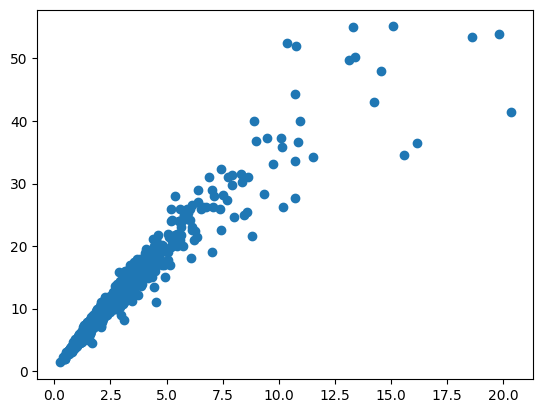

In [29]:
plt.scatter(combined_table['HOMA-IR'], combined_table['INSULIN'])

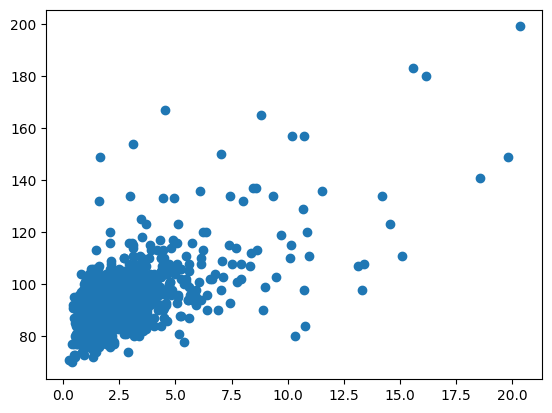

In [33]:
plt.scatter(combined_table['HOMA-IR'], combined_table['GLUCOSE'])

In [30]:
combined_table['GLYCOHEMOGLOBIN A1C'].describe()

count    1131.000000
mean        5.505305
std         0.432617
min         3.600000
25%         5.300000
50%         5.500000
75%         5.700000
max         8.300000
Name: GLYCOHEMOGLOBIN A1C, dtype: float64

## Plotting changes vs current values

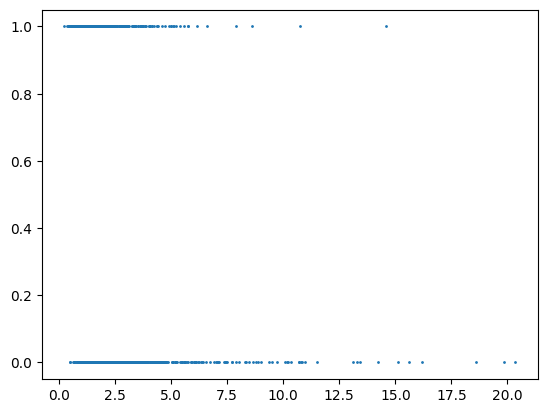

In [36]:
plt.scatter(combined_table['HOMA-IR'], combined_table['d_HOMA-IR_class'], s=1)

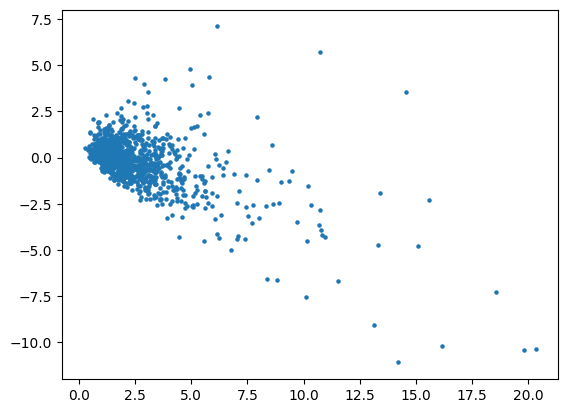

In [93]:
plt.scatter(combined_table['HOMA-IR'], combined_table['d_HOMA-IR'], s=5)

In [95]:
import statsmodels.api as sm

In [102]:
ols = sm.OLS(combined_table['d_HOMA-IR'], combined_table['HOMA-IR'].to_numpy()[:,np.newaxis])

results = ols.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              d_HOMA-IR   R-squared (uncentered):                   0.251
Model:                            OLS   Adj. R-squared (uncentered):              0.251
Method:                 Least Squares   F-statistic:                              379.3
Date:                Fri, 03 Nov 2023   Prob (F-statistic):                    4.51e-73
Time:                        14:31:59   Log-Likelihood:                         -1860.1
No. Observations:                1131   AIC:                                      3722.
Df Residuals:                    1130   BIC:                                      3727.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.2168      0.011    -19.476      0.000      -0.239      -0.195
==============================================================================
Omnibus:                      213.358   Durbin-Watson:                   1.846
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4917.714
Skew:                          -0.099   Prob(JB):                         0.00
Kurtosis:                      13.213   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

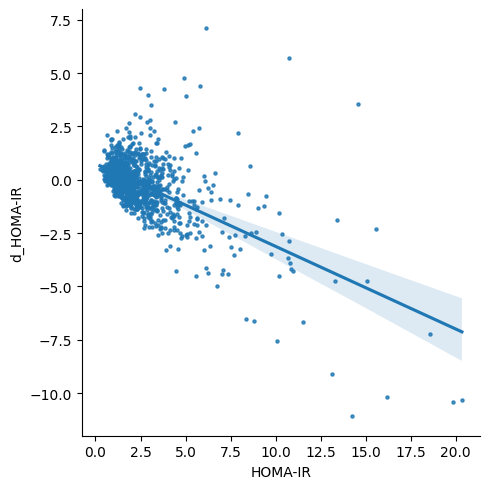

In [108]:
sns.lmplot(combined_table, x='HOMA-IR', y='d_HOMA-IR', scatter_kws={"s": 5})
plt.savefig('homa_ir_changes_vs_baseline.png', dpi=300)

In [109]:
ols = sm.OLS(combined_table['d_INSULIN'], combined_table['INSULIN'].to_numpy()[:,np.newaxis])

results = ols.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              d_INSULIN   R-squared (uncentered):                   0.196
Model:                            OLS   Adj. R-squared (uncentered):              0.195
Method:                 Least Squares   F-statistic:                              275.6
Date:                Fri, 03 Nov 2023   Prob (F-statistic):                    1.51e-55
Time:                        14:40:00   Log-Likelihood:                         -3311.9
No. Observations:                1131   AIC:                                      6626.
Df Residuals:                    1130   BIC:                                      6631.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.1725      0.010    -16.601      0.000      -0.193      -0.152
==============================================================================
Omnibus:                      135.854   Durbin-Watson:                   1.881
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1273.276
Skew:                          -0.021   Prob(JB):                    3.25e-277
Kurtosis:                       8.198   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

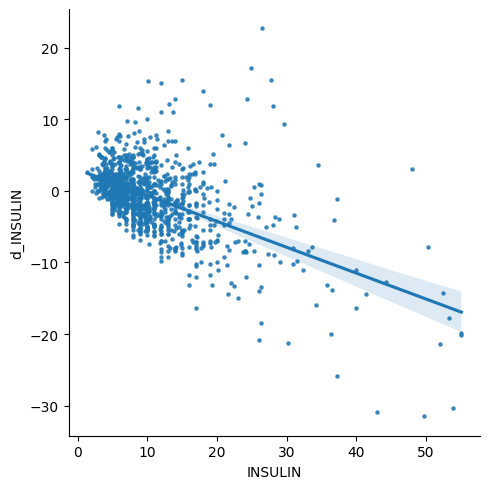

In [107]:
sns.lmplot(combined_table, x='INSULIN', y='d_INSULIN', scatter_kws={"s": 5})
plt.savefig('insulin_changes_vs_baseline.png', dpi=300)

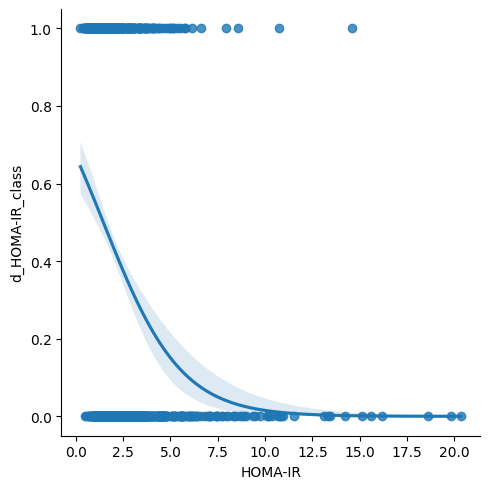

In [106]:
sns.lmplot(combined_table, x='HOMA-IR', y='d_HOMA-IR_class', logistic=True)

In [105]:
logit = sm.Logit(combined_table['d_HOMA-IR_class'], combined_table['HOMA-IR'].to_numpy()[:,np.newaxis])
result = logit.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.636169
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:        d_HOMA-IR_class   No. Observations:                 1131
Model:                          Logit   Df Residuals:                     1130
Method:                           MLE   Df Model:                            0
Date:                Fri, 03 Nov 2023   Pseudo R-squ.:                 0.05604
Time:                        14:33:23   Log-Likelihood:                -719.51
converged:                       True   LL-Null:                       -762.22
Covariance Type:            nonrobust   LLR p-value:                       nan
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.2403      0.024    -10.044      0.000      -0.287      -0.193
==============================================================================
"""

## Predicting d_class using only the baseline

### dHOMA-IR_class

In [71]:
from sklearn.linear_model import LogisticRegression

In [72]:
lr = LogisticRegression()

In [73]:
lr.fit(combined_table['HOMA-IR'].to_numpy()[:,np.newaxis], combined_table['d_HOMA-IR_class'])

LogisticRegression()

In [74]:
predictions = lr.predict(combined_table['HOMA-IR'].to_numpy()[:,np.newaxis])

In [75]:
sklearn.metrics.confusion_matrix(combined_table['d_HOMA-IR_class'], predictions)

array([[551, 125],
       [233, 222]])

In [76]:
sklearn.metrics.f1_score(combined_table['d_HOMA-IR_class'], predictions)

0.5536159600997507

In [77]:
sklearn.metrics.balanced_accuracy_score(combined_table['d_HOMA-IR_class'], predictions)

0.6515004226542688

In [78]:
lr.intercept_

array([0.70701175])

In [79]:
lr.coef_

array([[-0.48640869]])

### dHbA1C_class

In [80]:
lr.fit(combined_table['GLYCOHEMOGLOBIN A1C'].to_numpy()[:,np.newaxis], combined_table['d_HbA1C_class'])

LogisticRegression()

In [81]:
predictions = lr.predict(combined_table['GLYCOHEMOGLOBIN A1C'].to_numpy()[:,np.newaxis])

In [82]:
sklearn.metrics.confusion_matrix(combined_table['d_HbA1C_class'], predictions)

array([[939,   7],
       [175,  10]])

In [83]:
sklearn.metrics.f1_score(combined_table['d_HbA1C_class'], predictions)

0.09900990099009901

In [84]:
sklearn.metrics.balanced_accuracy_score(combined_table['d_HbA1C_class'], predictions)

0.5233272384435175

In [85]:
lr.intercept_

array([11.32979756])

In [86]:
lr.coef_

array([[-2.40143186]])